In [263]:
require(ggplot2)
data = read.csv('/Users/jmaddock/data/voice_comparison/simplified-data.csv')

if(!require(EMT)){install.packages("EMT")}
if(!require(rcompanion)){install.packages("rcompanion")}

data = as.data.frame(lapply(data, function (x) if (is.factor(x)) factor(x) else x))

#data$gender = factor(data$gender, levels = c("", "Man" , "These don't describe me",   "Woman"),
#              labels = c("NA", "Male", "Other", "Female"))

data$check1 = ifelse(data$check1 == "An article about dealing with stress", 1, 0)
data$check2 = ifelse(data$check2 == "His constant need for success", 1, 0)
data$check3 = ifelse(data$check3 == "It oxygenates your brain", 1, 0)
data$check4 = ifelse(data$check4 == "2 and 3", 1, 0)
data$check5 = ifelse(data$check5 == "Ask yourself if a thought is really true.", 1, 0)
data$check6 = ifelse(data$check6 == "Everything has to have a purpose", 1, 0)
data$check7 = ifelse(data$check7 == "Do less than you want to do", 1, 0)

#data$grade = round(rowMeans(data[, 15:21], na.rm = TRUE),2)*10

data$rate.speed = ordered(data$rate.speed, levels = c("Much too fast", "Too fast", "Just right",
                                                      "Too slow", "Much too slow"))
                            
data$rate.experience = ordered(data$rate.experience, levels = c("Very poor","Poor","OK","Good","Excellent"))


In [33]:
# Distributions ----
summary(data)

## Demographics ----
table(data$gender)
prop.table(table(data$gender, data$voice), margin=2)*100

require(psych)
describeBy(data$age)
describeBy(data$age, group = data$voice)

#table(data$income)
#table(data$state)
table(data$device)
table(data$headphones)

## Audio paused ----
#table(data$voice, data$audio.paused)
#table(data$voice, data$audio.paused, data$gender)

summary(data$audio.paused[data$voice == "Google A"])
summary(data$audio.paused[data$voice == "Google C"])
summary(data$audio.paused[data$voice == "Polly Sally"])
summary(data$audio.paused[data$voice == "Polly Joana"])
summary(data$audio.paused[data$voice == "Polly Matthew"])
summary(data$audio.paused[data$voice == "Voicery Nichole"])
summary(data$audio.paused[data$voice == "Deep Speech"])
summary(data$audio.paused[data$voice == "Android UK Male"])
summary(data$audio.paused[data$voice == "iOS Female"])
summary(data$audio.paused[data$voice == "Deep Speech Nancy"])
summary(data$audio.paused[data$voice == ".Jofish"])
summary(data$audio.paused[data$voice == ".Janice"])
summary(data$audio.paused[data$voice == ".Abe"])


       X                     MID       audio.paused      page.seconds   
 Min.   :  1.0   A1YSYI926BBOHW:  4   Min.   :  1.052   Min.   :   5.0  
 1st Qu.:223.5   A3O5EU9QQV2OS1:  3   1st Qu.:294.372   1st Qu.: 303.0  
 Median :446.0   AR1IWBDA7MC86 :  3   Median :312.888   Median : 327.0  
 Mean   :446.0   A16SAB417Y96G4:  2   Mean   :296.286   Mean   : 383.9  
 3rd Qu.:668.5   A18SXC3JEN1O0U:  2   3rd Qu.:319.574   3rd Qu.: 382.0  
 Max.   :891.0   A19L8SNH73AX1Z:  2   Max.   :403.540   Max.   :5862.0  
                 (Other)       :875   NA's   :53                        
  rate.experience         rate.speed    rate.again    
 Excellent:141    Much too fast:  5   Min.   : 0.000  
 Good     :330    Too fast     :127   1st Qu.: 1.000  
 OK       :283    Just right   :590   Median : 5.000  
 Poor     :115    Too slow     : 99   Mean   : 4.567  
 Very poor: 22    Much too slow: 18   3rd Qu.: 8.000  
                  NA's         : 52   Max.   :10.000  
                               


    NA   Male  Other Female 
     0      0      0      0 

        
         .Abe .Janice .Jofish Android UK Male Common Voice Deep Speech
  NA                                                                  
  Male                                                                
  Other                                                               
  Female                                                              
        
         Deep Speech Nancy Google A Google C iOS Female Mac Default Polly Joana
  NA                                                                           
  Male                                                                         
  Other                                                                        
  Female                                                                       
        
         Polly Matthew Polly Sally Text only Voicery Nichole Windows Female
  NA                                                                       
  Male                                                            

Warning message in describeBy(data$age):
“no grouping variable requested”

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,890,35.10787,10.73914,32,33.57303,7.413,18,84,66,1.329301,1.576585,0.3599769



 Descriptive statistics by group 
group: .Abe
   vars  n  mean    sd median trimmed mad min max range skew kurtosis   se
X1    1 49 34.71 10.24     33   33.41 8.9  22  64    42 1.16     0.89 1.46
------------------------------------------------------------ 
group: .Janice
   vars  n  mean   sd median trimmed  mad min max range skew kurtosis   se
X1    1 49 34.43 8.77     32   33.41 7.41  21  61    40 1.17     1.07 1.25
------------------------------------------------------------ 
group: .Jofish
   vars  n  mean    sd median trimmed mad min max range skew kurtosis   se
X1    1 55 37.87 12.21     33   36.64 8.9  20  72    52  0.9    -0.22 1.65
------------------------------------------------------------ 
group: Android UK Male
   vars  n  mean    sd median trimmed  mad min max range skew kurtosis   se
X1    1 48 36.27 11.13     34   35.05 8.15  21  64    43    1     0.08 1.61
------------------------------------------------------------ 
group: Common Voice
   vars  n  mean   sd median t


   Android phone   Android tablet             iPad           iPhone 
              37                2                5                9 
  Linux computer     Mac computer            Other Windows computer 
              12               77                7              742 


 No Yes 
213 626 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.195 312.888 312.888 271.059 312.888 314.559 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.141 320.424 320.424 279.845 320.424 322.140 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13.65  318.96  318.96  267.78  318.96  320.15 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.69  294.37  294.37  272.85  294.37  294.48 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.052 286.164 286.164 252.792 286.164 286.239 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  20.64  284.04  311.08  274.09  311.08  311.12 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  12.91  313.01  313.01  284.66  313.01  313.01       1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  185.8   366.0   366.0   360.9   366.0   366.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.198 296.736 296.934 280.907 296.934 297.608 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  272.2   314.7   314.7   313.7   314.7   314.7 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  32.61  309.19  309.19  297.65  309.19  309.65 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   41.8   301.6   301.6   287.0   301.6   302.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  33.88  403.49  403.49  393.09  403.49  403.54 

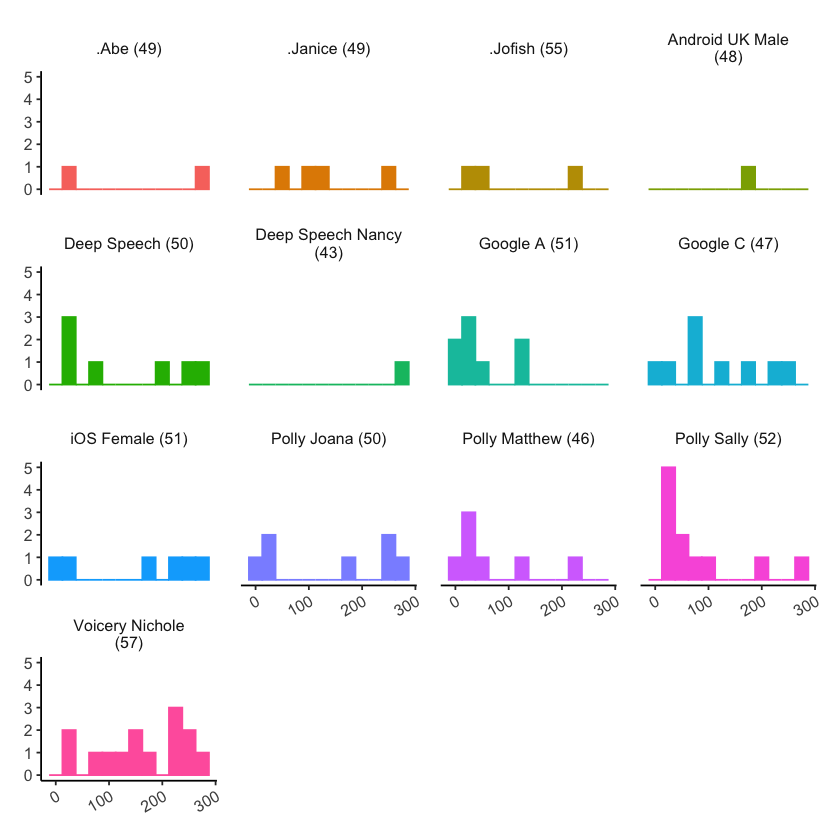

In [247]:
# where did people stop listening to it?

drop = c(

)

group_names.voice = c(
  "Deep Speech" = paste("Deep Speech (", nrow(data[data$voice == "Deep Speech",]) ,")", sep = ""),
  "Google A" = paste("Google A (", nrow(data[data$voice == "Google A",]) ,")", sep = ""),
  "Google C" = paste("Google C (", nrow(data[data$voice == "Google C",]) ,")", sep = ""),
  "Polly Joana" = paste("Polly Joana (", nrow(data[data$voice == "Polly Joana",]) ,")", sep = ""),
  "Polly Matthew" = paste("Polly Matthew (", nrow(data[data$voice == "Polly Matthew",]) ,")", sep = ""),
  "Polly Sally" = paste("Polly Sally (", nrow(data[data$voice == "Polly Sally",]) ,")", sep = ""),
  "Voicery Nichole" = paste("Voicery Nichole (", nrow(data[data$voice == "Voicery Nichole",]) ,")", sep = ""),
  "Android UK Male" = paste("Android UK Male (", nrow(data[data$voice == "Android UK Male",]) ,")", sep = ""),
  "iOS Female" = paste("iOS Female (", nrow(data[data$voice == "iOS Female",]) ,")", sep = ""),
  "Deep Speech Nancy" = paste("Deep Speech Nancy (", nrow(data[data$voice == "Deep Speech Nancy",]) ,")", sep = ""),
  ".Jofish" = paste(".Jofish (", nrow(data[data$voice == ".Jofish",]) ,")", sep = ""),
  ".Janice" = paste(".Janice (", nrow(data[data$voice == ".Janice",]) ,")", sep = ""),
  ".Abe" = paste(".Abe (", nrow(data[data$voice == ".Abe",]) ,")", sep = "")
)

ggplot(subset(data, audio.paused < 280 & voice %in% names(group_names.voice)), aes(x = audio.paused, color = voice, fill = voice)) +
  geom_histogram(stat = "bin", binwidth = 25) +
  #geom_density(alpha = 0.1) +
  facet_wrap( ~ voice, ncol = 4, labeller = as_labeller(group_names.voice, label_wrap_gen(width = 20)), drop = TRUE) +
  #facet_wrap( ~ voice, ncol = 4, labeller = labeller(unname(group_names.voice) = label_wrap_gen(width = 1)), drop = TRUE) +
  guides(color = FALSE, fill=FALSE) + 
#  xlab("When did people stop listening (before the end)") +
#  ylab("Count") +
  theme_classic() + 
  theme(plot.margin=unit(c(.5,.5,.5,.5),"cm"),
        text = element_text(size=12),
        axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1),
        axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        strip.background = element_blank(),
        panel.spacing = unit(1, "lines"))


In [249]:
summary(aov(audio.paused < 280 ~ voice, data = data))

             Df Sum Sq Mean Sq F value Pr(>F)    
voice        16  34.18  2.1361   22.77 <2e-16 ***
Residuals   821  77.03  0.0938                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
53 observations deleted due to missingness

In [253]:
kruskal.test(audio.paused < 280 ~ voice, data = data)


	Kruskal-Wallis rank sum test

data:  audio.paused < 280 by voice
Kruskal-Wallis chi-squared = 257.24, df = 16, p-value < 2.2e-16


                   
                    Excellent      Good        OK      Poor Very poor
  .Abe              18.367347 57.142857 20.408163  4.081633  0.000000
  .Janice            8.163265 40.816327 38.775510 10.204082  2.040816
  .Jofish           36.363636 52.727273  9.090909  1.818182  0.000000
  Android UK Male   10.416667 18.750000 29.166667 35.416667  6.250000
  Common Voice      14.634146 19.512195 56.097561  9.756098  0.000000
  Deep Speech        8.000000 36.000000 24.000000 28.000000  4.000000
  Deep Speech Nancy  6.976744 41.860465 32.558140 13.953488  4.651163
  Google A           9.803922 37.254902 37.254902 15.686275  0.000000
  Google C          17.021277 42.553191 31.914894  8.510638  0.000000
  iOS Female         7.843137 13.725490 41.176471 23.529412 13.725490
  Mac Default       21.212121 40.909091 22.727273 12.121212  3.030303
  Polly Joana       14.000000 36.000000 32.000000 14.000000  4.000000
  Polly Matthew     15.217391 39.130435 34.782609 10.869565  0.000000


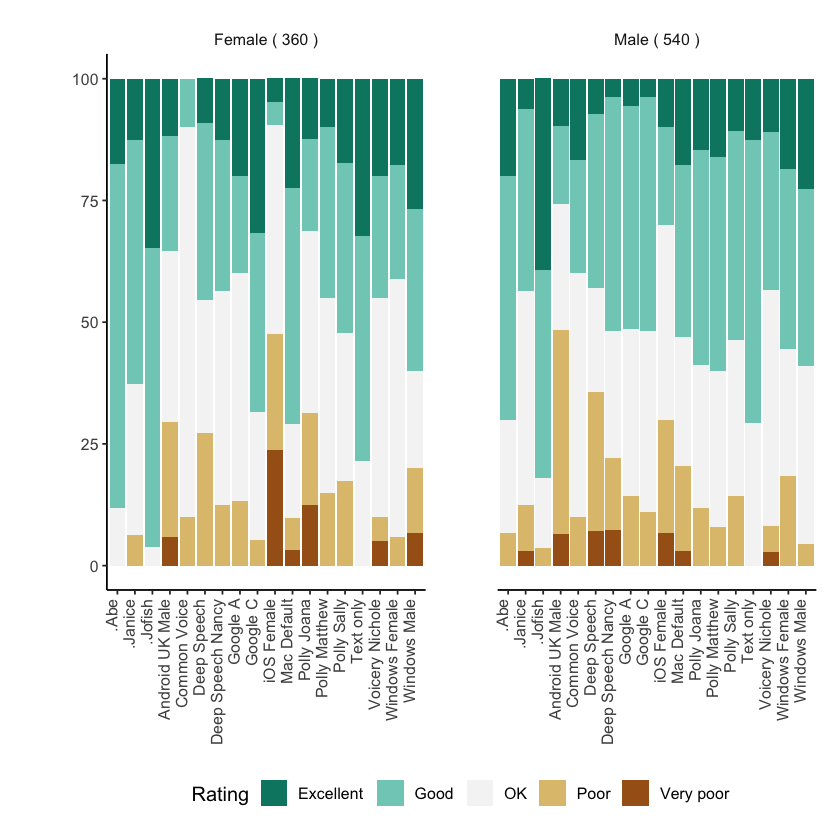

In [245]:
## Rating experience ----
prop.table(table(data$voice, data$rate.experience), margin = 1)*100

# broken down by gender ----
group_names.gender = c(
  "Male" = paste("Male (", nrow(data[data$gender == "Male",]) ,")"),
  "Female" = paste("Female (", nrow(data[data$gender == "Female",]) ,")")
)

temp = as.data.frame(round(prop.table(table(data$voice, data$rate.experience, data$gender), c(3,1)), digits = 3)*100)
temp = subset(temp, Var3 %in% names(group_names.gender))
ggplot(temp, aes(x = Var1, y = Freq, fill = Var2, 
                 label = Freq)) +
  geom_bar(stat="identity") + 
  facet_wrap( ~ Var3, labeller = as_labeller(group_names.gender)) +
  theme_classic() + 
  theme(plot.margin=unit(c(.5,.5,.5,1.5),"cm"),
        text = element_text(size=12),
        axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0),
        axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        strip.background = element_blank(),
        panel.spacing = unit(3, "lines"),
        legend.position = "bottom") +
  guides(fill = guide_legend(title = "Rating")) +
  scale_fill_brewer(palette = "BrBG", direction = -1)


In [266]:
temp = subset(data, gender %in% names(group_names.gender))
wilcox.test(as.numeric(rate.experience) ~ gender, data=temp) 


	Wilcoxon rank sum test with continuity correction

data:  as.numeric(rate.experience) by gender
W = 97150, p-value = 0.1676
alternative hypothesis: true location shift is not equal to 0


Warning message:
“Removed 10 rows containing missing values (position_stack).”

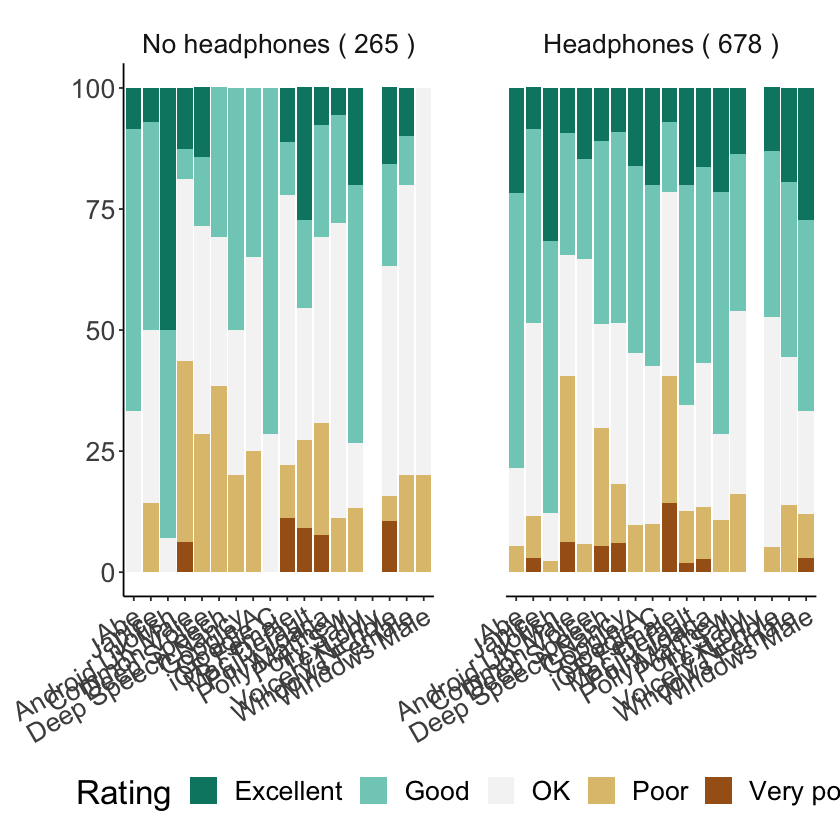

In [38]:
# broken down by headphone use ----
group_names.headphone = c(
  "No" = paste("No headphones (", nrow(data[data$headphones == "No",]) ,")"),
  "Yes" = paste("Headphones (", nrow(data[data$headphones == "Yes",]) ,")")
)

temp = as.data.frame(round(prop.table(table(data$voice, data$rate.experience, data$headphones), c(3,1)), digits = 3)*100)
ggplot(temp, aes(x = Var1, y = Freq, fill = Var2, 
                 label = Freq)) +
  geom_bar(stat="identity") + 
  facet_wrap( ~ Var3, labeller = as_labeller(group_names.headphone)) +
  theme_classic() + 
  theme(plot.margin=unit(c(.5,.5,.5,1.5),"cm"),
        text = element_text(size=20),
        axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1),
        axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        strip.background = element_blank(),
        panel.spacing = unit(3, "lines"),
        legend.position = "bottom") +
  guides(fill = guide_legend(title = "Rating")) +
  scale_fill_brewer(palette = "BrBG", direction = -1)


In [267]:
wilcox.test(as.numeric(rate.experience) ~ headphones, data=data)


	Wilcoxon rank sum test with continuity correction

data:  as.numeric(rate.experience) by headphones
W = 57940, p-value = 0.002796
alternative hypothesis: true location shift is not equal to 0


Warning message:
“Removed 5 rows containing missing values (position_stack).”

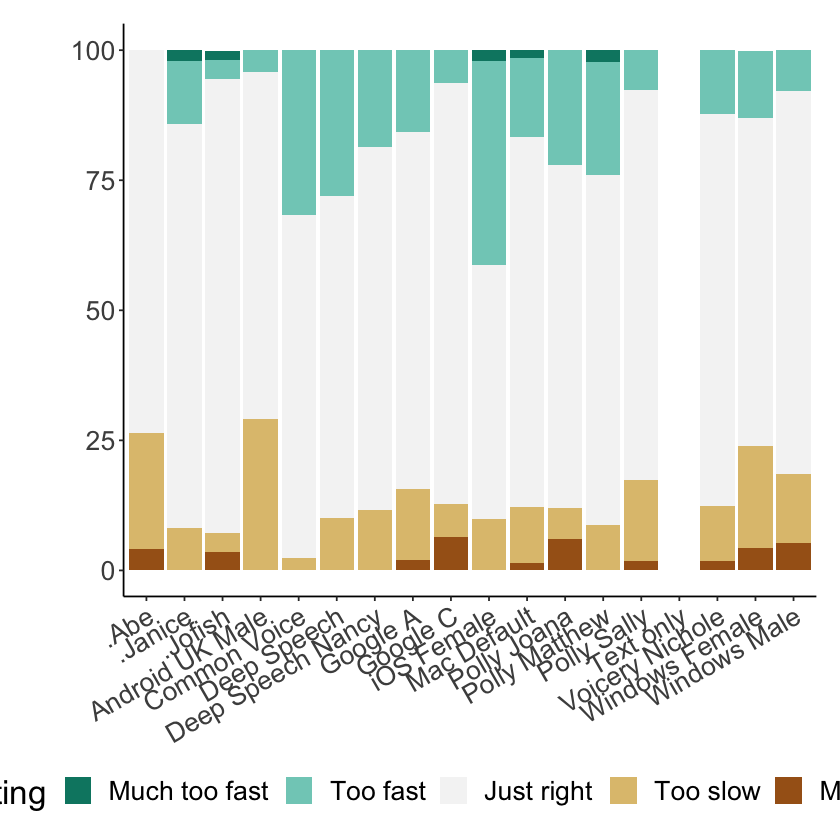

In [39]:
## Rate speed ----
temp = as.data.frame(round(prop.table(table(data$voice, data$rate.speed), margin = 1), digits = 3)*100)
ggplot(temp, aes(x = Var1, y = Freq, fill = Var2, 
                 label = Freq)) +
  geom_bar(stat="identity") + 
  theme_classic() + 
  theme(plot.margin=unit(c(.5,.5,.5,1.5),"cm"),
        text = element_text(size=20),
        axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1),
        axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        strip.background = element_blank(),
        panel.spacing = unit(3, "lines"),
        legend.position = "bottom") +
  guides(fill = guide_legend(title = "Rating")) +
  scale_fill_brewer(palette = "BrBG", direction = -1)


Warning message:
“Removed 10 rows containing missing values (position_stack).”

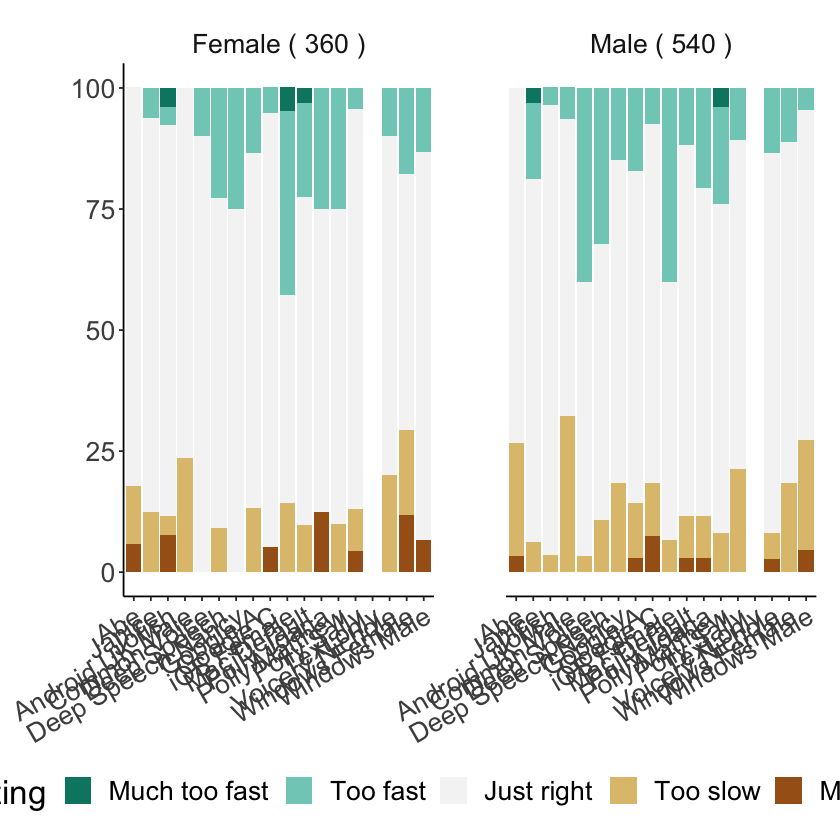

In [93]:
# broken down by gender ----
temp = as.data.frame(round(prop.table(table(data$voice, data$rate.speed, data$gender), c(3,1))[,,-c(4,3)], digits = 3)*100)
ggplot(temp, aes(x = Var1, y = Freq, fill = Var2, 
                 label = Freq)) +
  geom_bar(stat="identity") + 
  facet_wrap( ~ Var3, labeller = as_labeller(group_names.gender)) +
  theme_classic() + 
  theme(plot.margin=unit(c(.5,.5,.5,1.5),"cm"),
        text = element_text(size=20),
        axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1),
        axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        strip.background = element_blank(),
        panel.spacing = unit(3, "lines"),
        legend.position = "bottom") +
  guides(fill = guide_legend(title = "Rating")) +
  scale_fill_brewer(palette = "BrBG", direction = -1)


                   
                     0  1  2  3  4  5  6  7  8  9 10
  .Abe               2  5  3  3  4  2  2  6  9  6  7
  .Janice            9  5  6  6  1  3  6  4  5  1  3
  .Jofish            3  1  0  0  0  0  6  8 11 14 12
  Android UK Male   19 10  3  1  4  1  1  5  2  0  2
  Common Voice      12  4  5  3  4  2  3  2  1  4  1
  Deep Speech       15  8  3  2  2  3  1  4  5  5  2
  Deep Speech Nancy 10  5  5  5  1  2  6  5  1  0  3
  Google A          11  8  2  4  3  1  4  7  4  2  5
  Google C           6  3  4  0  2  2  5  7  5  9  4
  iOS Female        26  9  4  2  0  3  2  1  1  3  0
  Mac Default       13  4  1  2  3  2  5 12 14  8  2
  Polly Joana       11  2  6  3  6  2  3  7  3  3  4
  Polly Matthew      3  2  7  5  4  5  4  4  6  3  3
  Polly Sally       10  4  6  5  3  3  4  3  7  6  1
  Text only          0  0  0  0  0  0  0  0  0  0  0
  Voicery Nichole    9  2  8  6  2  1  7  8  5  3  6
  Windows Female     5  7  5  3  2  3  3  4  3  6  5
  Windows Male       3  2 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   4.000   4.196   7.000  10.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   7.000   5.723   9.000  10.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   4.000   4.288   8.000  10.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    1.25    4.00    4.30    7.00   10.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.250   5.000   4.978   7.750  10.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   6.000   4.807   7.000  10.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    2.00    3.64    7.00   10.00 

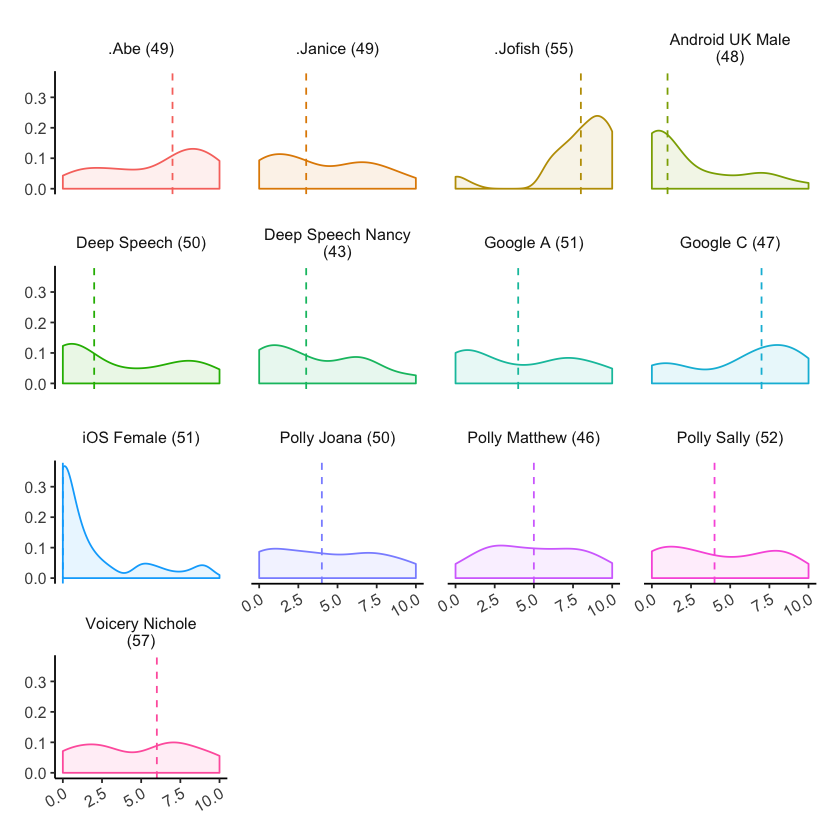

In [221]:
## Re-listen rating ----
table(data$voice, data$rate.again)

summary(data$rate.again[data$voice == "Google A"])
summary(data$rate.again[data$voice == "Google C"])
summary(data$rate.again[data$voice == "Polly Sally"])
summary(data$rate.again[data$voice == "Polly Joana"])
summary(data$rate.again[data$voice == "Polly Matthew"])
summary(data$rate.again[data$voice == "Voicery Nichole"])
summary(data$rate.again[data$voice == "Deep Speech"])


temp = subset(data, voice %in% names(group_names.voice))

median = aggregate(rate.again ~ voice, data=temp, FUN = "median")

ggplot(temp, aes(x = rate.again, color = voice, fill = voice)) +
  #geom_histogram(stat = "bin", binwidth = 1) +
  geom_density(alpha = 0.1) +
  facet_wrap( ~ voice, ncol = 4, labeller = as_labeller(group_names.voice, label_wrap_gen(width = 20)), drop = TRUE) +
  guides(color = FALSE, fill=FALSE) + 
  theme_classic() + 
  theme(plot.margin=unit(c(.5,.5,.5,.5),"cm"),
        text = element_text(size=12),
        axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1),
        axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        strip.background = element_blank(),
        panel.spacing = unit(1, "lines")) +
  geom_vline(data=median, aes(xintercept=rate.again, color=voice),
             linetype="dashed")


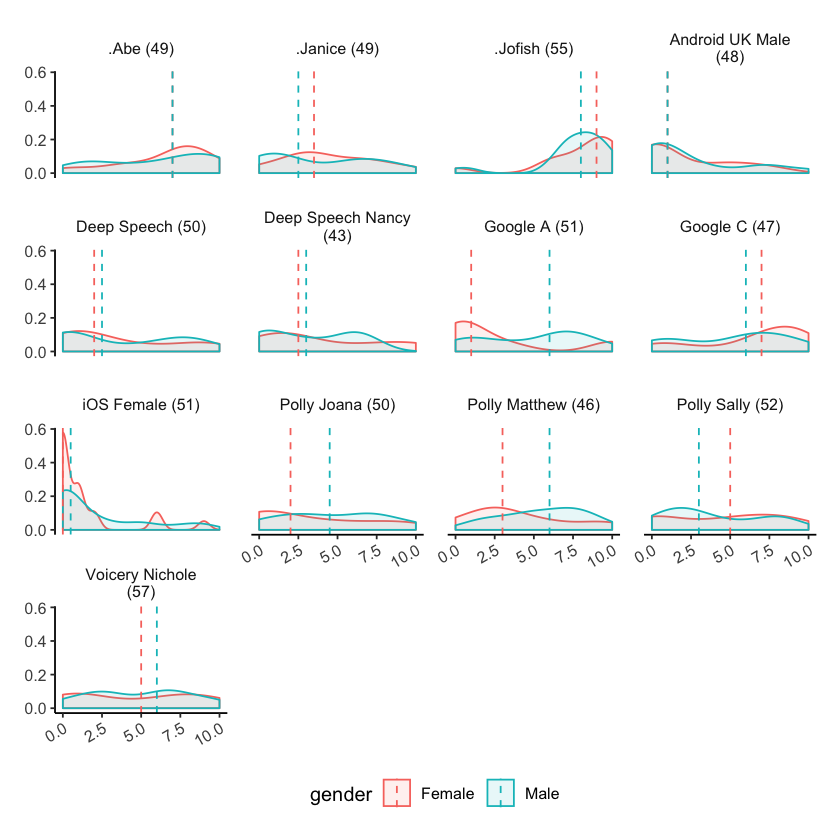

In [224]:
# broken down by gender ----
temp = subset(data, gender %in% c("Male", "Female") & voice %in% names(group_names.voice))

median.gender = aggregate(rate.again ~ voice + gender, 
                          data=temp, FUN = "median")

ggplot(temp, aes(x = rate.again, color = gender, fill = gender)) +
  geom_density(alpha = 0.1) +
  facet_wrap( ~ voice, ncol = 4, labeller = as_labeller(group_names.voice, label_wrap_gen(width = 20)), drop = TRUE) +
  theme_classic() + 
  theme(plot.margin=unit(c(.5,.5,.5,.5),"cm"),
        text = element_text(size=12),
        axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1),
        axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        strip.background = element_blank(),
        panel.spacing = unit(1, "lines"),
        legend.position = "bottom") +
  geom_vline(data=median.gender, aes(xintercept=rate.again, color=gender),
             linetype="dashed")



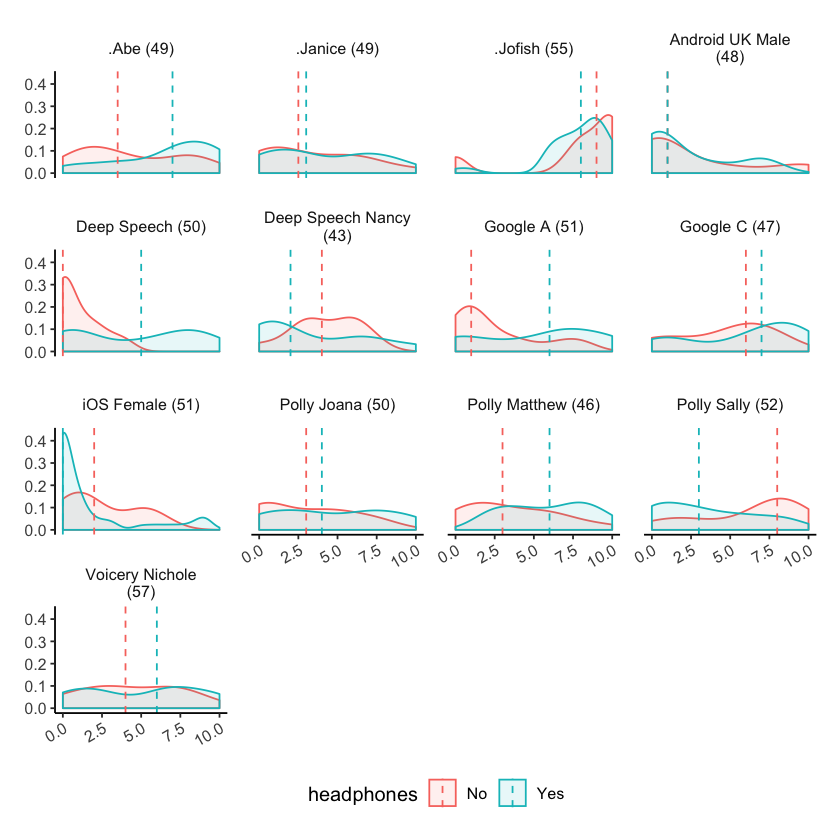

In [230]:
# broken down by headphone use ----
temp = subset(data, voice %in% names(group_names.voice))

median.headphones = aggregate(rate.again ~ voice + headphones, data=temp, FUN = "median")

ggplot(temp, aes(x = rate.again, color = headphones, fill = headphones)) +
  geom_density(alpha = 0.1) +
  facet_wrap( ~ voice, ncol = 4, labeller = as_labeller(group_names.voice, label_wrap_gen(width = 20)), drop = TRUE) +
  theme_classic() + 
  theme(plot.margin=unit(c(.5,.5,.5,.5),"cm"),
        text = element_text(size=12),
        axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1),
        axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        strip.background = element_blank(),
        panel.spacing = unit(1, "lines"),
        legend.position = "bottom") +
  geom_vline(data=median.headphones, aes(xintercept=rate.again, color=headphones),
             linetype="dashed")


                   
                    Voice was easy to comprehend.
  .Abe                                       73.5
  .Janice                                    57.1
  .Jofish                                    83.6
  Android UK Male                            22.9
  Common Voice                               46.3
  Deep Speech                                26.0
  Deep Speech Nancy                          58.1
  Google A                                   49.0
  Google C                                   55.3
  iOS Female                                 27.5
  Mac Default                                47.0
  Polly Joana                                56.0
  Polly Matthew                              50.0
  Polly Sally                                57.7
  Text only                                   0.0
  Voicery Nichole                            42.1
  Windows Female                             52.2
  Windows Male                               42.1

                   
                    Voice is monotone.
  .Abe                            36.7
  .Janice                         16.3
  .Jofish                         14.5
  Android UK Male                 75.0
  Common Voice                    61.0
  Deep Speech                     70.0
  Deep Speech Nancy               58.1
  Google A                        52.9
  Google C                        48.9
  iOS Female                      88.2
  Mac Default                     47.0
  Polly Joana                     64.0
  Polly Matthew                   65.2
  Polly Sally                     61.5
  Text only                        0.0
  Voicery Nichole                 52.6
  Windows Female                  52.2
  Windows Male                    50.0

                   
                    Voice sounded natural.
  .Abe                                57.1
  .Janice                             67.3
  .Jofish                             74.5
  Android UK Male                     12.5
  Common Voice                        14.6
  Deep Speech                         20.0
  Deep Speech Nancy                   11.6
  Google A                            19.6
  Google C                            21.3
  iOS Female                           2.0
  Mac Default                         25.8
  Polly Joana                         18.0
  Polly Matthew                       15.2
  Polly Sally                         13.5
  Text only                            0.0
  Voicery Nichole                     29.8
  Windows Female                      30.4
  Windows Male                        28.9

                   
                    Voice lacked emotion/personality.
  .Abe                                           32.7
  .Janice                                        22.4
  .Jofish                                         9.1
  Android UK Male                                72.9
  Common Voice                                   65.9
  Deep Speech                                    60.0
  Deep Speech Nancy                              83.7
  Google A                                       52.9
  Google C                                       53.2
  iOS Female                                     82.4
  Mac Default                                    51.5
  Polly Joana                                    62.0
  Polly Matthew                                  63.0
  Polly Sally                                    63.5
  Text only                                       0.0
  Voicery Nichole                                59.6
  Windows Female                                 52.2
  Window

                   
                    I could focus on the content.
  .Abe                                       61.2
  .Janice                                    59.2
  .Jofish                                    72.7
  Android UK Male                            27.1
  Common Voice                               56.1
  Deep Speech                                14.0
  Deep Speech Nancy                          51.2
  Google A                                   45.1
  Google C                                   55.3
  iOS Female                                 25.5
  Mac Default                                31.8
  Polly Joana                                46.0
  Polly Matthew                              37.0
  Polly Sally                                46.2
  Text only                                   0.0
  Voicery Nichole                            49.1
  Windows Female                             45.7
  Windows Male                               36.8

Number of cases in table: 891 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 356.1, df = 306, p-value = 0.02562
	Chi-squared approximation may be incorrect

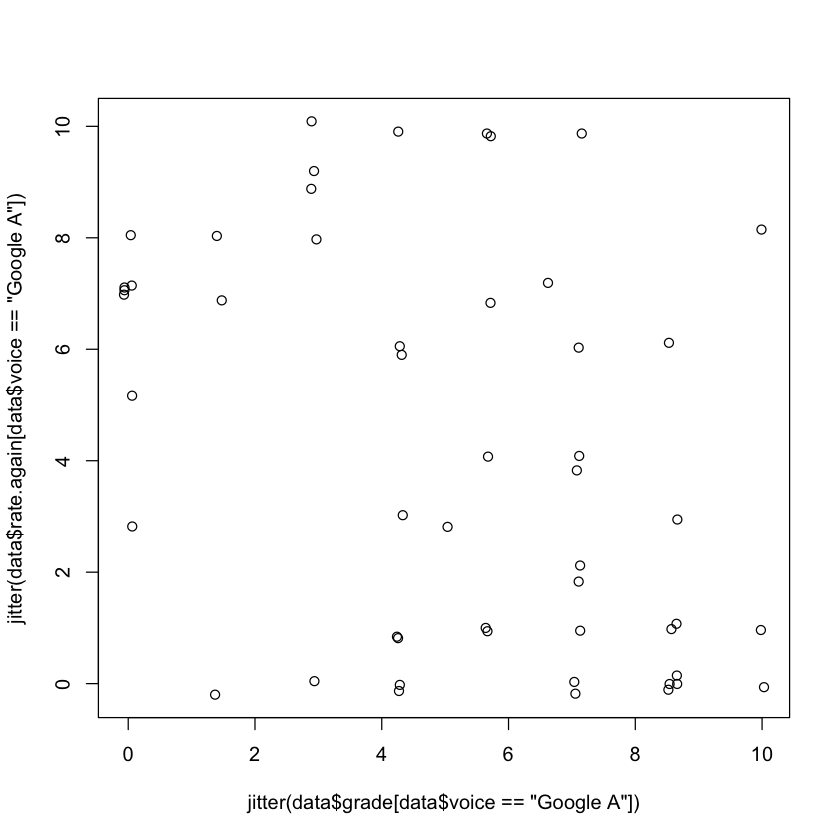

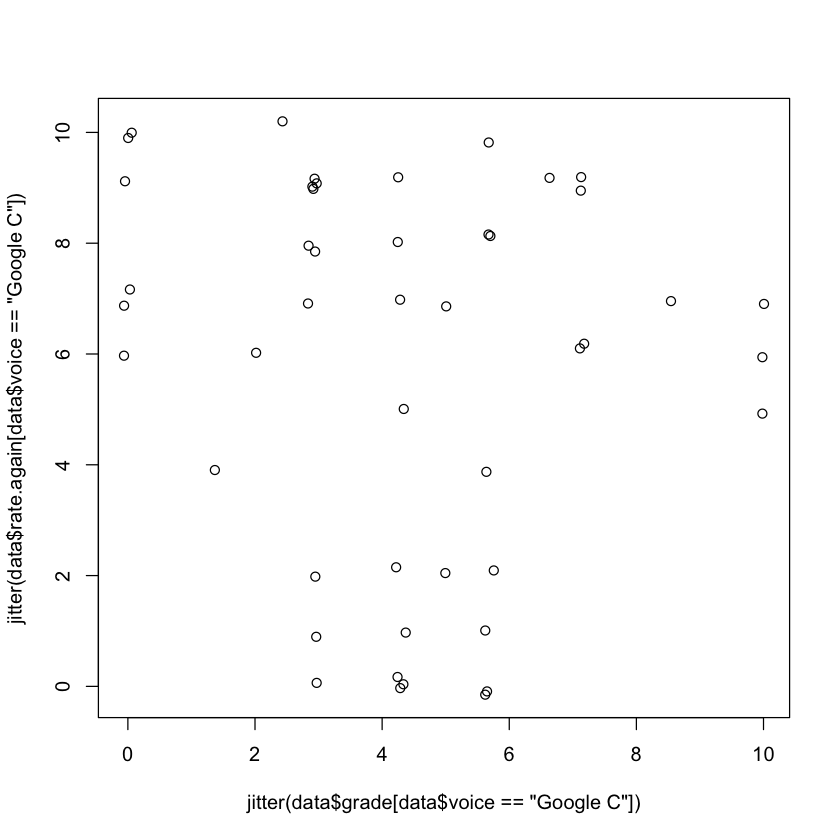

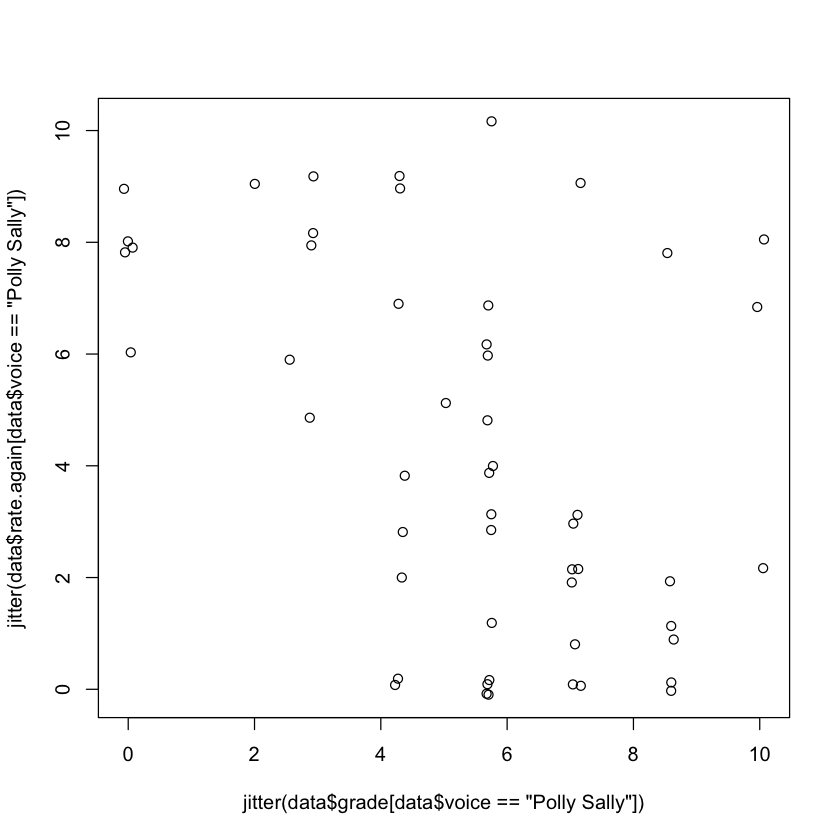

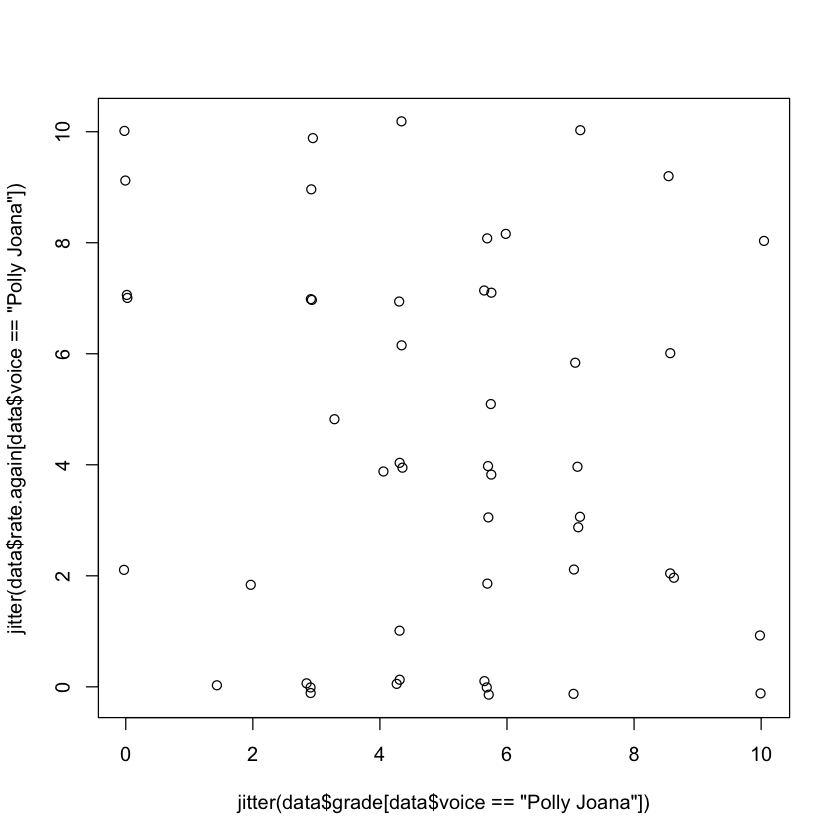

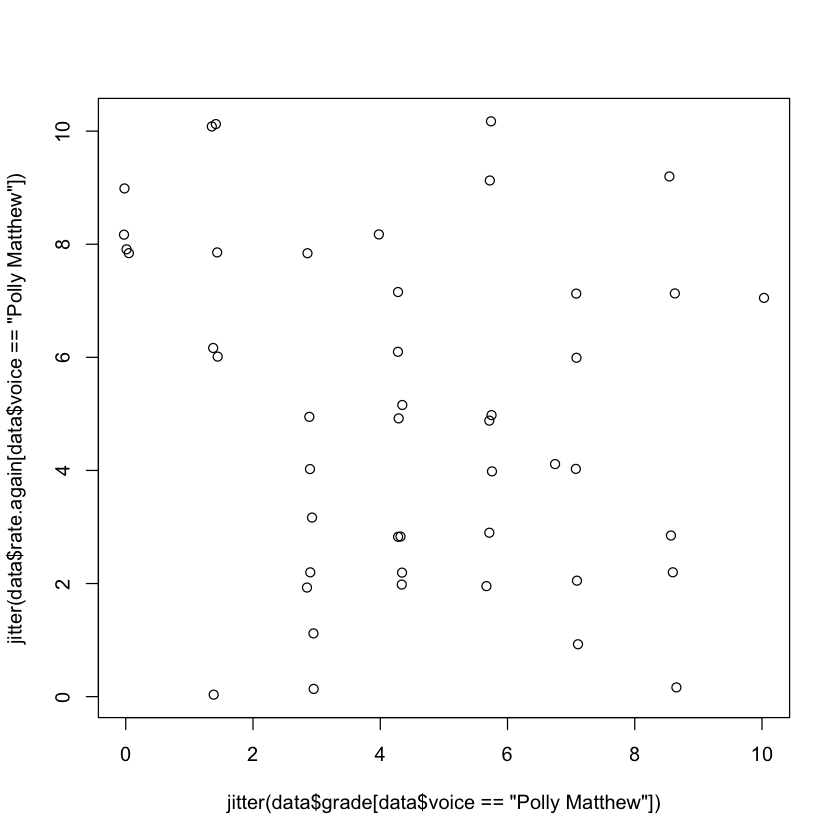

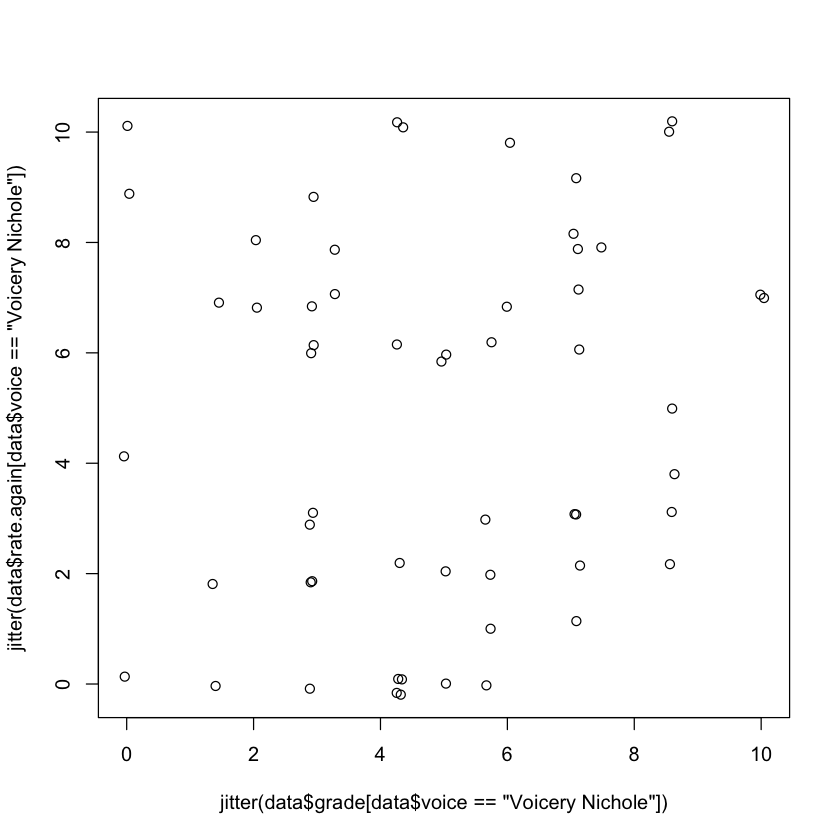

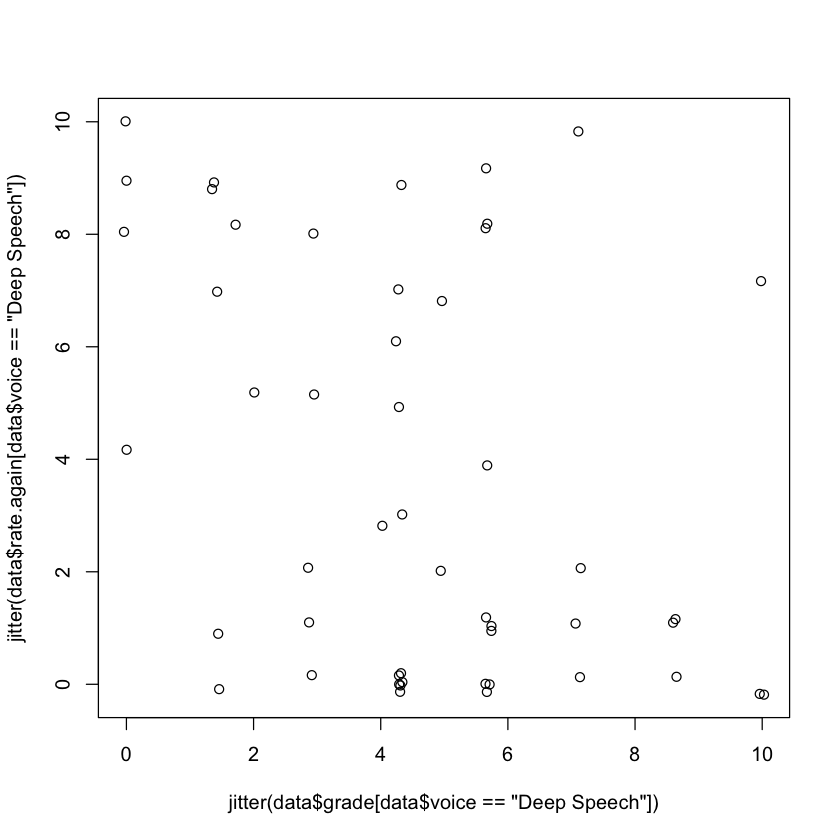

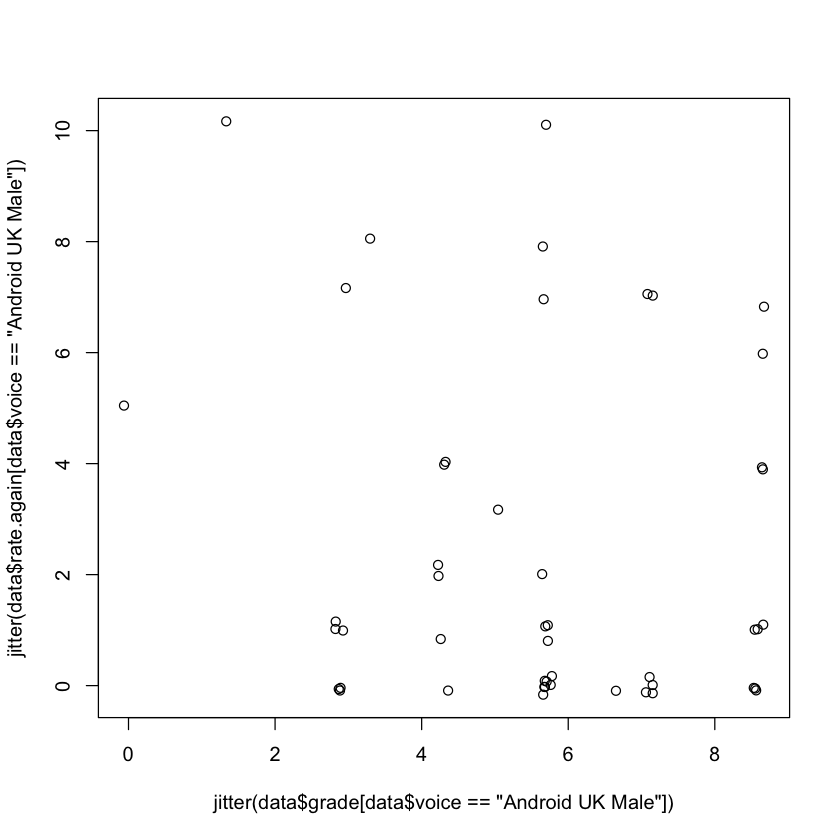

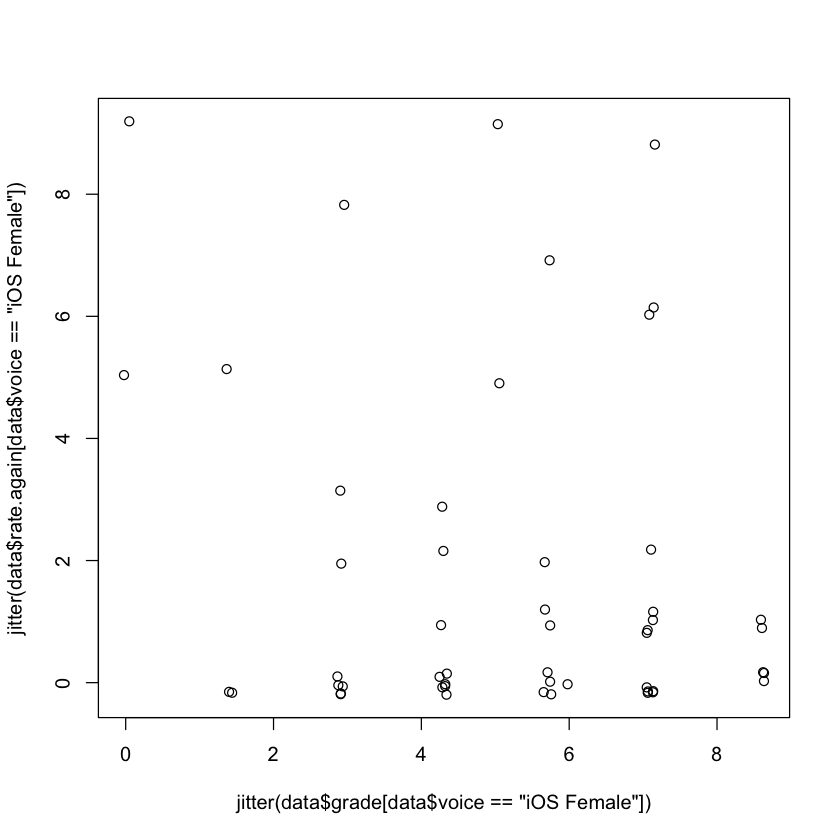

ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): 'x' and 'y' lengths differ


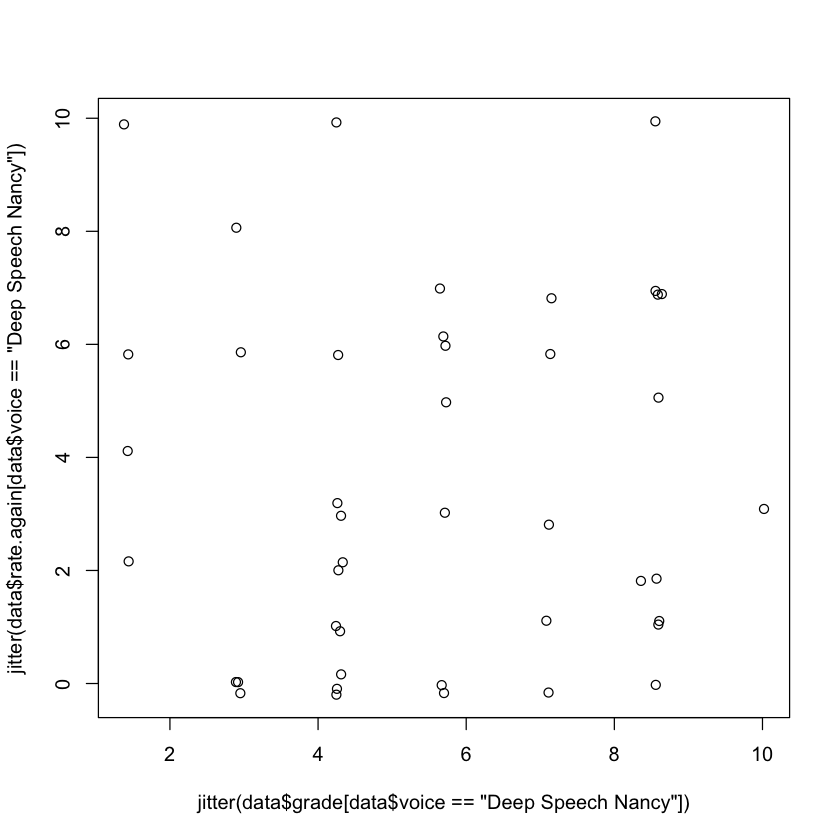

In [228]:
## Voice opinions ----
round(table(data$voice, data$voice.easy)/(as.vector(t(table(data$voice)))), digits = 3)*100
round(table(data$voice, data$voice.monotone)/(as.vector(t(table(data$voice)))), digits = 3)*100
round(table(data$voice, data$voice.natural)/(as.vector(t(table(data$voice)))), digits = 3)*100
round(table(data$voice, data$voice.no_emotion)/(as.vector(t(table(data$voice)))), digits = 3)*100
round(table(data$voice, data$voice.focus)/(as.vector(t(table(data$voice)))), digits = 3)*100

## Comprehension ----
summary(table(data$voice, data$grade))
plot(jitter(data$grade[data$voice == "Google A"]), jitter(data$rate.again[data$voice == "Google A"]))
plot(jitter(data$grade[data$voice == "Google C"]), jitter(data$rate.again[data$voice == "Google C"]))
plot(jitter(data$grade[data$voice == "Polly Sally"]), jitter(data$rate.again[data$voice == "Polly Sally"]))
plot(jitter(data$grade[data$voice == "Polly Joana"]), jitter(data$rate.again[data$voice == "Polly Joana"]))
plot(jitter(data$grade[data$voice == "Polly Matthew"]), jitter(data$rate.again[data$voice == "Polly Matthew"]))
plot(jitter(data$grade[data$voice == "Voicery Nichole"]), jitter(data$rate.again[data$voice == "Voicery Nichole"]))
plot(jitter(data$grade[data$voice == "Deep Speech"]), jitter(data$rate.again[data$voice == "Deep Speech"]))
plot(jitter(data$grade[data$voice == "Android UK Male"]), jitter(data$rate.again[data$voice == "Android UK Male"]))
plot(jitter(data$grade[data$voice == "iOS Female"]), jitter(data$rate.again[data$voice == "iOS Female"]))
plot(jitter(data$grade[data$voice == "Deep Speech Nancy"]), jitter(data$rate.again[data$voice == "Deep Speech Nancy"]))
plot(jitter(data$grade[data$voice == "Text only"]), jitter(data$rate.again[data$voice == "Text Only "]))

median.grade = aggregate(grade ~ voice, data=data, FUN = "median")
mean.grade = aggregate(grade ~ voice, data=data, FUN = "mean")


ggplot(data, aes(x = grade, color = voice, fill = voice)) +
  geom_density(alpha = 0.1) +
  facet_wrap( ~ voice, ncol = 4, labeller = as_labeller(group_names.voice), drop = TRUE) +
  guides(color = FALSE, fill=FALSE) + 
  theme_classic() + 
  theme(plot.margin=unit(c(.5,.5,.5,.5),"cm"),
        text = element_text(size=25),
        axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1),
        axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        strip.background = element_blank(),
        panel.spacing = unit(3, "lines")) +
  geom_vline(data=median.grade, aes(xintercept=grade, color=voice),
             linetype="dashed")


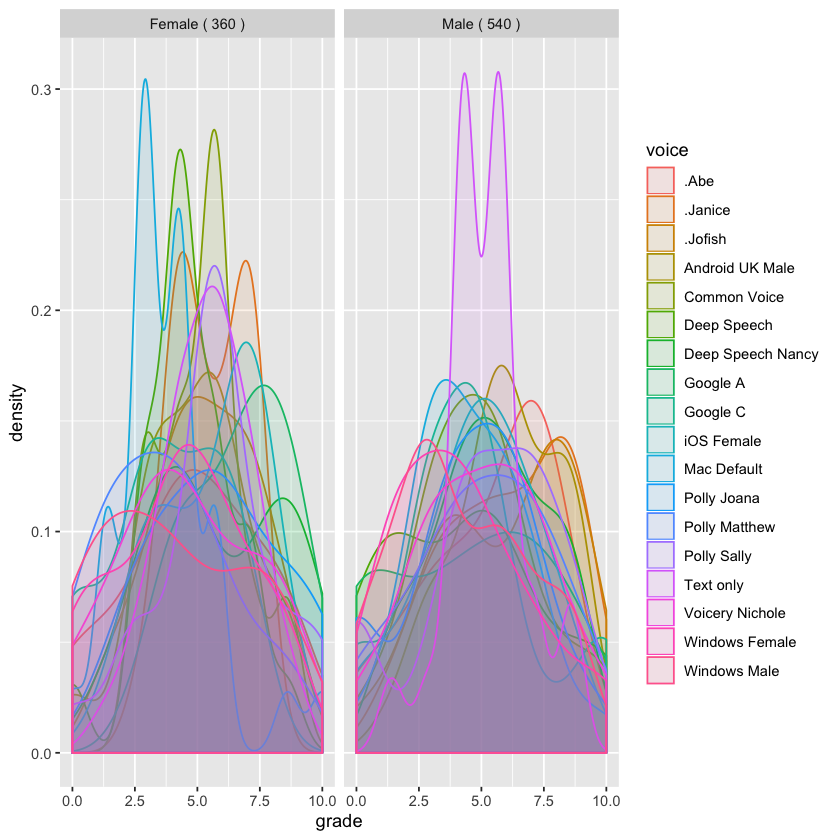

In [94]:
# broken down by gender ----
ggplot(subset(data, gender %in% c("Male", "Female")), aes(x = grade, color = voice, fill = voice)) +
  geom_density(alpha = 0.1) +
  facet_wrap( ~ gender, labeller = as_labeller(group_names.gender), drop = TRUE)